In [1]:
from nbindex import floating
floating.tableofcontent()

## Parsing dates, JSON

The Twiiter social network has a lot of public message, which can be downloaded freely. A sample of these is saved into `data/twitter_sample.gz`.
* First read the compressed file with the following command:

```
import gzip
l=[json.loads(str(s).strip("\r\n")) for s in gzip.open("../data/twitter_sample.gz",mode="rt").readlines()]
```

The `created_at` column contains the date when messages were sent. Plot how many tweets were sent every minute by the users! Use the `strptime()` and `strftime()` functions from the **datetime** module, which are described in detail [here](https://www.tutorialspoint.com/python/time_strptime.htm) and [here](https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior).

Mind that not all entries have `created_at` value, and you should drop those!

### Solution

In [1]:
import pandas as pd
import json

In [2]:
import gzip
l=[json.loads(str(s).strip("\r\n")) for s in gzip.open("../data/twitter_sample.gz",mode="rt").readlines()]
df=pd.DataFrame.from_dict(l)

In [3]:
from datetime import datetime

In [4]:
ts=pd.DataFrame(\
    df["created_at"].dropna().\
    map(lambda d: datetime.strptime(d,'%a %b %d %H:%M:%S +0000 %Y').\
    strftime('%H:%M'))).groupby("created_at").size()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

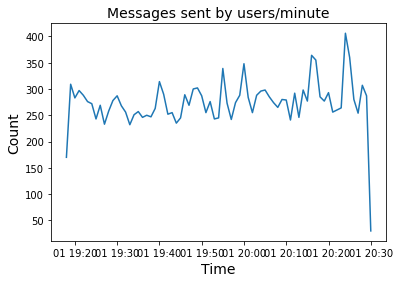

In [9]:
plt.plot(ts.index.map(lambda x: datetime.strptime(x,"%H:%M")),ts)
plt.title("Messages sent by users/minute", fontsize=14)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Count", fontsize=14);